#### Обработка данных

In [1]:
import pandas as pd
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go

from scipy import optimize as opt 
import scipy
import scipy.odr as odr

from statsmodels.stats.weightstats import *

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data1 = pd.read_csv('data/experiment1.csv') # Считываем данные
data2 = pd.read_csv('data/experiment2.csv')

In [3]:
data1.head(5) # Посмотрим на несколько значений

,﻿h0,h1,h2,h3,h4,beta
0,0,7,8,2,30,17
1,0,7,8,2,31,20
2,0,6,8,1,29,25
3,0,5,8,1,27,30
4,0,5,8,1,27,35


In [4]:
data2.head(5) # Посмотрим на несколько значений

,﻿x,h1,h2,h3,h4
0,16,7,8,2,31
1,20,7,2,2,18
2,24,7,1,4,14
3,28,7,12,15,26
4,32,7,14,21,23


In [5]:
data1['beta'] = data1['beta'] - 17

In [6]:
delta = data1['h1'] / data1['h2']
delta_syst = 0.0 # delta * (1.0 / data1['h1'] + 1.0 / data1['h2'])

nu = (data1['h4'] - data1['h3']) / (data1['h4'] + data1['h3'])
nu_syst = 0.7 / (data1['h4'] + data1['h3']) * (0.7 + nu * 0.7) # 1.0 / (data1['h4'] + data1['h3']) * (1.0 + nu * 1.0)

nu_1 = (2 * sqrt(delta)) / (1 + delta)
nu_1_syst = delta_syst * (1.0 / (1 + delta) / sqrt(delta) + 2 * sqrt(delta) / (1 + delta) / (1 + delta))

In [7]:
nu_3 = nu / nu_1
nu_3_error = nu_3 * (nu_syst / nu + nu_1_syst / nu_1)

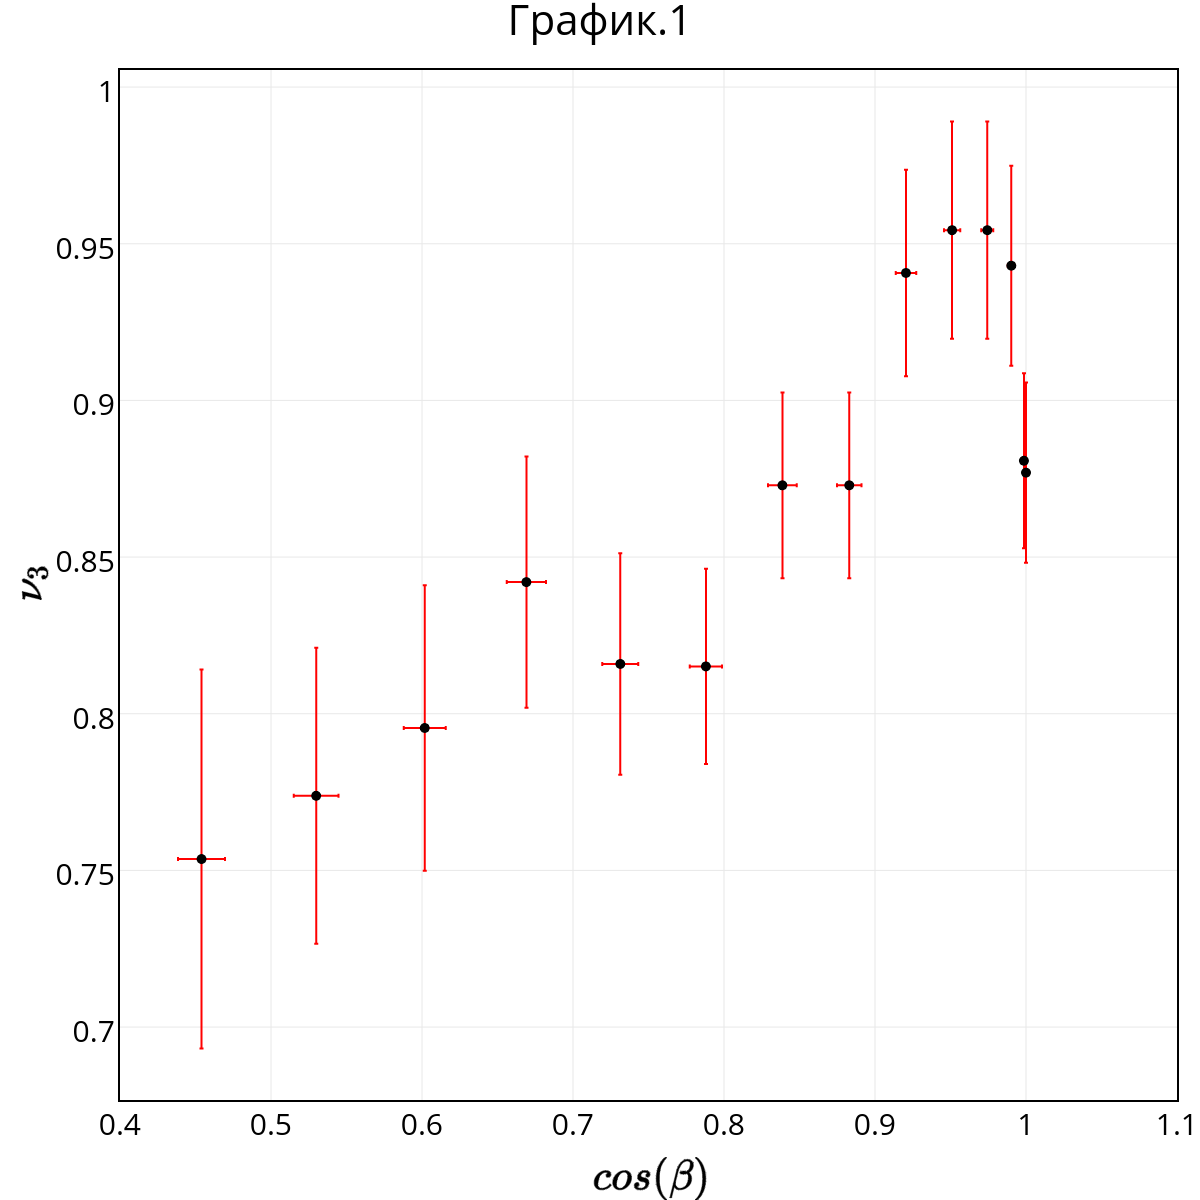

In [8]:
trace1 = go.Scatter(
    x = cos(data1['beta'] / 180.0 * pi),
    y = nu_3,
    mode = 'markers',
    name = '$D_l$',
    error_y = dict(
        type = 'data',
        array = nu_3_error,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'data',
        array = sin(data1['beta'] / 180.0 * pi) / 180.0 * pi,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    ),
)

trace0 = [trace1]

layout = go.Layout(
    showlegend=False,
    legend=dict(
        #x=0.9,
        #y=1
        orientation= "h"
    ),
    title = "График.1",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$cos(β)$',
        range = [0.4, 1.1],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$ν_3$',
        #range = [0, 11],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot1.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot1.png", width=500)

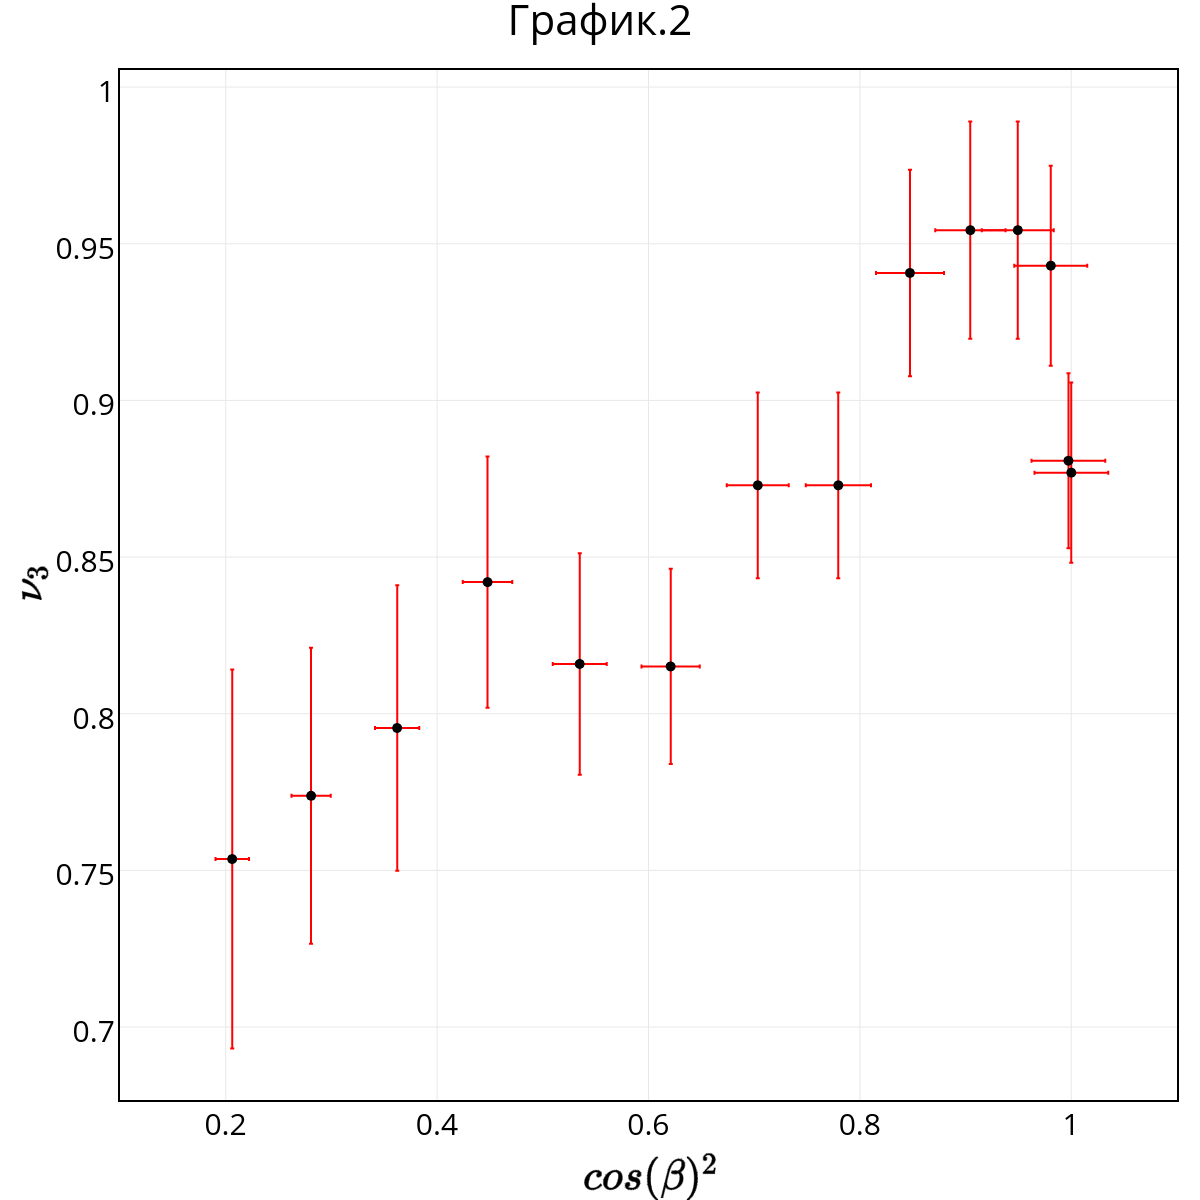

In [9]:
trace1 = go.Scatter(
    x = cos(data1['beta'] / 180.0 * pi) * cos(data1['beta'] / 180.0 * pi),
    y = nu_3,
    mode = 'markers',
    name = '$D_l$',
    error_y = dict(
        type = 'data',
        array = nu_3_error,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'data',
        array = 2*cos(data1['beta'] / 180.0 * pi) / 180.0 * pi,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    ),
)

trace0 = [trace1]

layout = go.Layout(
    showlegend=False,
    legend=dict(
        #x=0.9,
        #y=1
        orientation= "h"
    ),
    title = "График.2",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$cos(β)^2$',
        range = [0.1, 1.1],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$ν_3$',
        #range = [0, 11],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot2.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot2.png", width=500)

In [10]:
delta_2 = data2['h1'] / data2['h2']
delta_syst_2 = 0.0 # delta * (1.0 / data1['h1'] + 1.0 / data1['h2'])

nu_2 = (data2['h4'] - data2['h3']) / (data2['h4'] + data2['h3'])
nu_2_syst = 1.0 / (data2['h4'] + data2['h3']) * (1.0 + nu_2 * 1.0) # 1.0 / (data1['h4'] + data1['h3']) * (1.0 + nu * 1.0)

nu_1_2 = (2 * sqrt(delta_2)) / (1 + delta_2)
nu_1_2_syst = delta_syst_2 * (1.0 / (1 + delta_2) / sqrt(delta_2) + 2 * sqrt(delta_2) / (1 + delta_2) / (1 + delta_2))

In [11]:
nu_3_2 = nu_2 / nu_1_2
nu_3_2_error = nu_3_2 * (nu_2_syst / nu_2 + nu_1_2_syst / nu_1_2)

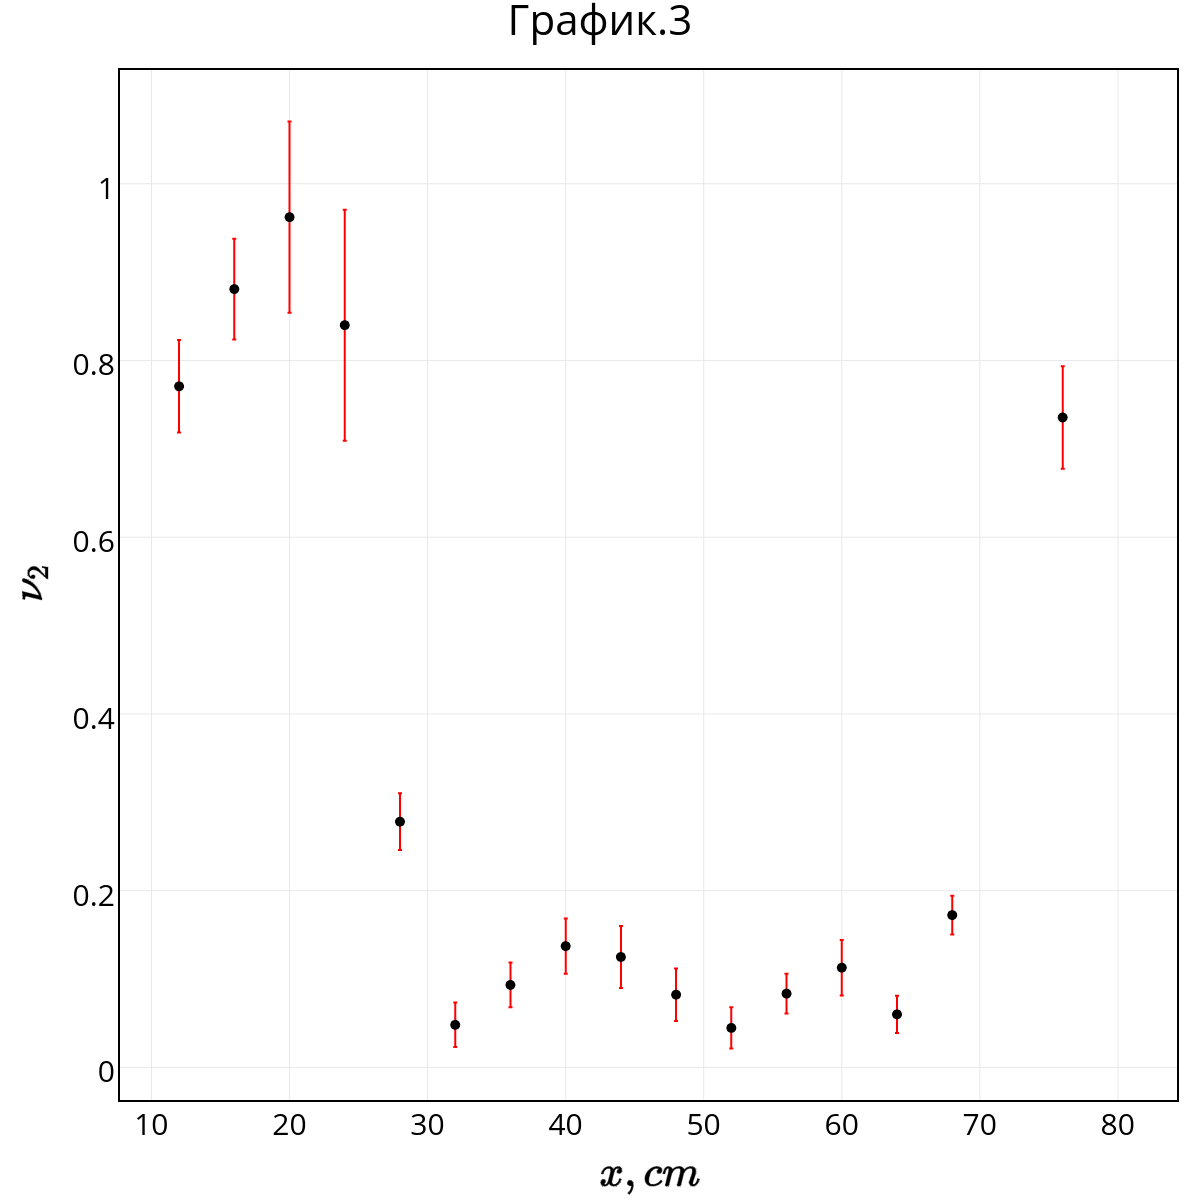

In [12]:
trace1 = go.Scatter(
    x = data2['﻿x'],
    y = nu_3_2,
    mode = 'markers',
    name = '$D_l$',
    error_y = dict(
        type = 'data',
        array = nu_3_2_error,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    ),
)

trace0 = [trace1]

layout = go.Layout(
    showlegend=False,
    legend=dict(
        #x=0.9,
        #y=1
        orientation= "h"
    ),
    title = "График.3",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$x, cm$',
        #range = [0.0, 1.5],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$ν_2$',
        #range = [0, 11],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot3.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot3.png", width=500)